In [128]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
data1=pd.read_csv('C:/Users/admin/Downloads/insurance.csv')

In [129]:
data1['smoker']=data1['smoker'].map({'yes': 1, 'no': 0})
data1['charges']=data1['charges'].apply(lambda x:1 if x > 10000 else 0)

In [130]:
data1=data1.drop('region', axis=1)

In [131]:
data1=pd.get_dummies(data1, columns=['sex'],drop_first=True)

In [132]:
correlations = data1.corr()
print(correlations['charges'])

age         0.464396
bmi         0.070513
children    0.016882
smoker      0.541199
charges     1.000000
sex_male    0.008164
Name: charges, dtype: float64


<AxesSubplot:>

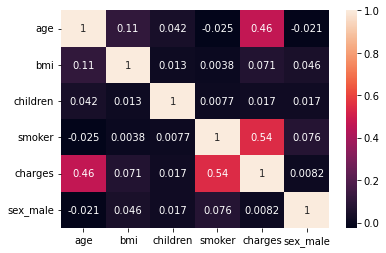

In [133]:
import seaborn as sns
sns.heatmap(correlations, annot=True)

In [134]:
data1=data1.drop('sex_male', axis=1)

In [135]:
data1=data1.drop('bmi', axis=1)

In [136]:
data1=data1.drop('children', axis=1)


In [137]:
X=data1.drop('charges' ,axis=1)
y=data1['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [138]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)

In [139]:
X_test_scaled = mms.transform(X_test)

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors': range(2, 12, 2), 'weights':['uniform', 'distance']}
clf=GridSearchCV(knn, parameters)
clf.fit(X_train_scaled, y_train)
pred_grid=clf.predict(X_test_scaled)
accuracy_grid= accuracy_score(pred_grid, y_test)
print(accuracy_grid)

0.9303482587064676


In [141]:
clf.best_params_

{'n_neighbors': 4, 'weights': 'uniform'}

In [142]:
clf.best_score_

0.9146804235257747

I first got approx 0.9. We decided to drop the bmi column that didn't have much correlation and the score went up tp approx 0.92.